# Filtrage de Kalman

## Introduction

### Cas linéaire discret

\begin{align*}
\tag{équation d'état}
   X_{k+1} &= A\,X_{k} + B\,W_k\ 0\leq k<k_{max}
   \\
\tag{équation d'observation}
   Y_{k} &= H\,X_{k} + V_k   
\end{align*}

- $X_k\to\mathbb{R}^n$, $Y_k\to\mathbb{R}^d$
- bruit d'état: $W_k\to\mathbb{R}^m$, $W_k\sim N(0,Q_W)$
- bruit de mesure: $V_k\to\mathbb{R}^d$, $V_k\sim N(0,Q_V)$, $Q_V>0$
- $A\in\mathbb{R}^{n\times n}$, $B\in\mathbb{R}^{m\times n}$, $H\in\mathbb{R}^{n\times d}$

### Cas linéaire continu/discret

\begin{align*}
\tag{équation d'état}
   \dot X(t) &= A\,X(t) + B\,\xi(t)
   \\
\tag{équation d'observation}
   Y_{k} &= H\,X(t_k) + V_k   
\end{align*}

- $0=t_1<t_1<t_2\cdots$
- $X(t)\to\mathbb{R}^n$, $Y_k\to\mathbb{R}^d$
- bruit d'état: $\xi(t)$ bruit blanc centré de covariance $Q_\xi$
- bruit de mesure: $V_k\to\mathbb{R}^d$, $V_k\sim N(0,Q_V)$, $Q_V>0$
- $A\in\mathbb{R}^{n\times n}$, $B\in\mathbb{R}^{m\times n}$, $H\in\mathbb{R}^{n\times d}$




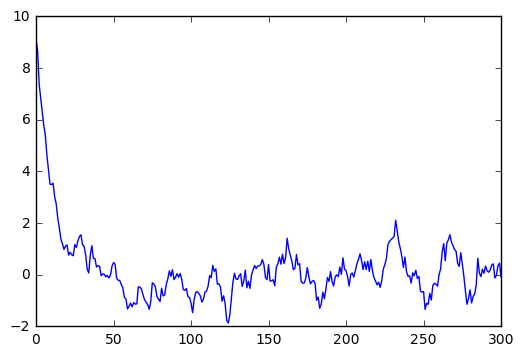

In [42]:
import numpy as np
import matplotlib.pyplot as plt

kmax = 300

EX0, VX0 = 10, 5
A, B, QW = 0.9, 1, 0.1
sQW = np.sqrt(QW)
sVX0 = np.sqrt(VX0)

np.random.seed(112)

def sys_lin(EX0, sVX0, A, B, sQW):
    W = np.random.randn(kmax)
    X = np.ones(kmax+1)
    X[0] = EX0+sVX0*np.random.randn()
    for k in range(kmax):
        X[k+1] = A*X[k]+B*sQW*W[k]
    return X

X = sys_lin(EX0, sVX0, A, B, sQW)
plt.plot(X)
plt.show()

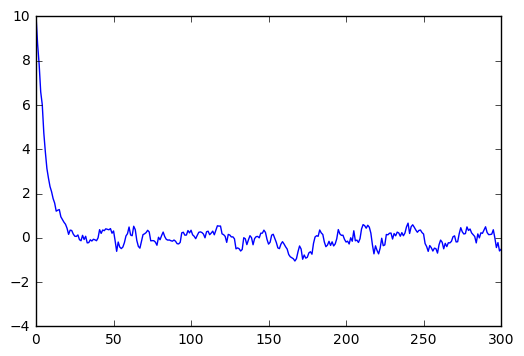

In [46]:
from IPython.html.widgets import interact, fixed

def plt_sys_lin(A, B, iseed):
    np.random.seed(iseed)
    X = sys_lin(10, 0, A, B, 1)
    plt.plot(X)
    plt.ylim([-4,10])
    plt.show()
    
interact(plt_sys_lin, A=(0,1,0.01), B=(0.,6,0.1), iseed=(1,100,1))
plt.show()
